#### 1.1 数据检查，处理NaN值 

In [19]:
# import pandas as pd

# # 读取CSV文件
# data = pd.read_csv(r'D:\招聘数据猎聘\finaldata_1_2.csv', encoding='utf-8')

# # 检查是否存在NaN值
# if data.isnull().values.any():
#     # 将所有NaN值替换为字符串类型
#     data = data.fillna('').astype(str)
#     # 将处理后的数据保存到新的CSV文件
#     data.to_csv('modified_file.csv', index=False)


#### 1.2 添加一列 num 作为计数

In [29]:
import pandas as pd

# 读取 CSV 文件
data = pd.read_csv('finaldata_1_2.csv', encoding='utf-8')

# 添加一列名为 'num'，赋值为 1
data['num'] = 1

NaN（Not a Number）是一种特殊的数值类型，表示缺失值或不可用值。在Python中，NaN是由NumPy和Pandas库引入的，用于表示缺失数据。NaN实际上是浮点数类型，在Python中由float类型表示。

当数据中存在缺失值时，Pandas通常使用NaN来表示这些缺失值。它是一种方便的方式来标记缺失数据，在数据处理和分析中很常见。例如，读取CSV文件时，Pandas会将空值或其他不可用值转换为NaN。

在Pandas中，可以使用pd.isna()或pd.isnull()方法来检查数据中的NaN值，以及fillna()方法将NaN值替换为其他值。通常，在处理数据之前，最好先检查和处理这些NaN值，确保数据的准确性和完整性。

#### 2 统一薪资区间
保留以“薪”“k”为结尾的数据
保留月薪格式的数据，且只按起薪表示 --> 20k、30k  

In [30]:

# 使用 endswith() 方法筛选以 'k' 或 '薪' 结尾的行
filtered_data = data[data['薪资'].str.endswith(('k', '薪'))]


# 保存筛选后的数据到新的 CSV 文件
filtered_data.to_csv('filtered_data.csv', index=False)


In [31]:

# 读取 CSV 文件
data = pd.read_csv('filtered_data.csv',encoding='utf-8')

# 处理薪资列，保留“-”前的内容
data['薪资'] = data['薪资'].apply(lambda x: x.split('-')[0])

# 保存修改后的数据到新的 CSV 文件
data.to_csv('modified_data_1.csv', index=False)


#### 查看薪资分布

In [32]:
# 读取 CSV 文件
data = pd.read_csv('modified_data_1.csv', encoding='utf-8')

dict2 = dict()

for i in data.iloc[:,2]:
    if i not in dict2.keys(): 
        dict2[i] = 1
    else:
        dict2[i] += 1

# print(dict2)

sorted_dict = {k: v for k, v in sorted(dict2.items(), key=lambda item: item[1], reverse=True)}

print(sorted_dict)


{'20k': 713, '30k': 641, '25k': 512, '15k': 378, '40k': 327, '35k': 188, '50k': 186, '10k': 118, '18k': 98, '12k': 94, '60k': 76, '45k': 62, '70k': 59, '16k': 53, '8k': 51, '13k': 49, '14k': 38, '80k': 36, '28k': 35, '55k': 33, '100k': 26, '17k': 22, '11k': 20, '23k': 15, '9k': 14, '22k': 14, '19k': 13, '6k': 12, '65k': 12, '90k': 11, '26k': 11, '21k': 10, '7k': 10, '5k': 9, '27k': 9, '24k': 7, '150k': 7, '75k': 5, '29k': 5, '95k': 5, '3k': 3, '4k': 3, '1k': 3, '140k': 3, '200k': 3, '120k': 2, '160k': 1, '2k': 1, '110k': 1, '170k': 1, '400k': 1}


#### 将薪资分布数量少于100条的

####  3 统一规模区间
0-20人；20-99人；100-499人；500-999人；1000-9999人；10000人以上  

{0-20人:['0-20人'],20-99人:['1-49人','20-99人','50-99人'],100-499人:['100-299人','300-499人','100-499人'], 500-999人:['500-999人'], 1000-9999人:['1000-2000人','2000-5000人','1000-9999人','5000-10000人'],  10000人以上:['10000人以上']}

#### 查看企业规模分布

In [33]:
# 读取 CSV 文件
data = pd.read_csv('modified_data_1.csv', encoding='utf-8')

dict8 = dict()

for i in data.iloc[:,8]:
    if i not in dict8.keys(): 
        dict8[i] = 1
    else:
        dict8[i] += 1

# print(dict2)

sorted_dict = {k: v for k, v in sorted(dict8.items(), key=lambda item: item[1], reverse=True)}

print(sorted_dict)

{'10000人以上': 1065, '100-499人': 508, '500-999人': 382, '20-99人': 309, '无': 308, '50-99人': 267, '100-299人': 239, '1000-9999人': 198, '2000-5000人': 161, '1-49人': 159, '1000-2000人': 114, '5000-10000人': 91, '0-20人': 88, '300-499人': 79, nan: 38}


In [36]:
# 处理企业规模列，使用fillna()方法将缺失值替换为字符串类型，删掉多余空格
data['企业规模'] = data['企业规模'].fillna('').astype(str).apply(lambda x: x.strip())

# NaN（Not a Number）是一种特殊的数值类型，表示缺失值或不可用值，实际上是浮点数类型

# 创建字典映射关系
mapping = {
    '微型': '0-20人',
    '小型': ['1-49人', '20-99人', '50-99人'],
    '中型': ['100-299人', '300-499人', '100-499人','500-999人','1000-2000人'],
    '大型': ['2000-5000人', '1000-9999人', '5000-10000人','10000人以上']
}

# 用字典进行替换
for key, value in mapping.items():
    data['企业规模'] = data['企业规模'].replace(value, key)

# list_all = []
# for i in data['企业规模']:
#     if i not in list_all:
#         list_all.append(i)
# print(list_all)

# 保存修改后的数据到新的 CSV 文件
data.to_csv('modified_data_2.csv', index=False)

In [46]:
# 读取 CSV 文件
data = pd.read_csv('modified_data_2.csv', encoding='utf-8')

dict8 = dict()

for i in data.iloc[:,8]:
    if i not in dict8.keys(): 
        dict8[i] = 1
    else:
        dict8[i] += 1

# print(dict2)

sorted_dict = {k: v for k, v in sorted(dict8.items(), key=lambda item: item[1], reverse=True)}

print(sorted_dict)

{'大型': 1629, '中型': 1208, '小型': 735, '无': 308, '微型': 88, nan: 38}


In [47]:
# 来源
dict11 = dict()

for i in data.iloc[:,11]:
    if i not in dict11.keys(): 
        dict11[i] = 1
    else:
        dict11[i] += 1

sorted_dict = {k: v for k, v in sorted(dict11.items(), key=lambda item: item[1], reverse=True)}

print(sorted_dict)


{'猎聘': 2515, '智联': 1188, 'boss': 303}


In [48]:
# 工作经验
# print(df.iloc[:,3])

dict3 = dict()

for i in data.iloc[:,3]:
    if i not in dict3.keys(): 
        dict3[i] = 1
    else:
        dict3[i] += 1

sorted_dict = {k: v for k, v in sorted(dict3.items(), key=lambda item: item[1], reverse=True)}

print(sorted_dict)


{'3-5年': 1420, '经验不限': 962, '1-3年': 837, '5-10年': 700, '10年以上': 55, '1年以下': 32}


In [49]:
# 学历
# print(df.iloc[:,4])

dict4 = dict()

for i in data.iloc[:,4]:
    if i not in dict4.keys(): 
        dict4[i] = 1
    else:
        dict4[i] += 1

sorted_dict = {k: v for k, v in sorted(dict4.items(), key=lambda item: item[1], reverse=True)}

print(sorted_dict)


{'本科': 2363, '硕士': 1359, '博士': 115, '学历不限': 102, '大专': 64, 'EMBA': 1, '中专/中技': 1, '高中': 1}


In [50]:
# 区位
# print(df.iloc[:,1])

dict1 = dict()

for i in data.iloc[:,1]:
    if i not in dict1.keys(): 
        dict1[i] = 1
    else:
        dict1[i] += 1

sorted_dict = {k: v for k, v in sorted(dict1.items(), key=lambda item: item[1], reverse=True)}

print(sorted_dict)


{'北京': 1140, '北京-海淀': 980, '北京-朝阳': 612, '北京-昌平': 116, '深圳-南山': 74, '上海-浦东': 71, '北京-顺义': 67, '北京-西城': 66, '北京-大兴': 61, '北京-东城': 54, '北京-丰台': 50, '成都-武侯': 49, '杭州-滨江': 47, '杭州-余杭': 46, '北京-通州': 41, '北京-石景山': 38, '深圳-龙岗': 37, '广州-天河': 35, '成都-双流': 31, '深圳-福田': 27, '上海-闵行': 24, '广州-黄埔': 23, '深圳-宝安': 17, '上海-杨浦': 16, '深圳-坪山': 16, '杭州-西湖': 16, '成都-郫都': 15, '上海-嘉定': 13, '广州-海珠': 13, '深圳-光明': 13, '上海-黄浦': 12, '上海-徐汇': 10, '广州-番禺': 9, '广州-南沙': 9, '广州-越秀': 9, '深圳-罗湖': 9, '成都-锦江': 9, '杭州-萧山': 9, '深圳-龙华': 8, '杭州-上城': 8, '上海-长宁': 7, '上海-松江': 7, '上海-虹口': 6, '杭州': 6, '成都-青羊': 6, '上海-宝山': 5, '成都-金牛': 5, '成都-成华': 5, '杭州-钱塘': 5, '上海': 4, '上海-静安': 4, '广州': 4, '深圳': 4, '成都': 4, '杭州-临平': 4, '上海-普陀': 3, '广州-花都': 3, '上海-青浦': 3, '广州-白云': 3, '杭州-拱墅': 3, '浦东新区': 2, '成都-龙泉驿': 2, '成都-温江': 2, '杭州-临安': 2, '北京-怀柔': 2, '成都-高新': 1, '上海-崇明': 1, '成都-邛崃': 1, '成都-新津': 1, '广州-从化': 1}


从 区位 薪资 工作年限 学历 关键词 行业 企业规模 这几方面进行分析。  
并分析薪资与其他因素的关系，分析哪些行业，什么规模的企业对算法工程师需求大，以及企业用人标准。从关键词分析高频技能。

#### 4 企业类别合并

In [51]:
# 企业类别
dict7 = dict()

for i in data.iloc[:,7]:
    if i not in dict7.keys(): 
        dict7[i] = 1
    else:
        dict7[i] += 1

sorted_dict = {k: v for k, v in sorted(dict7.items(), key=lambda item: item[1], reverse=True)}

print(sorted_dict)

{'互联网': 925, '计算机软件': 354, nan: 280, '人工智能': 139, 'IT服务': 97, '人力资源服务': 76, '整车制造': 75, '云计算/大数据': 74, '智能硬件': 72, '电子/半导体/集成电路': 72, '通信设备': 71, '在线社交/媒体': 64, '专业技术服务': 63, '在线教育': 53, '生活服务': 53, '生活服务O2O': 51, '银行': 46, '基金/证券/期货': 46, '互联网医疗': 41, '科技金融': 37, '电子商务': 35, '咨询服务': 29, '移动互联网': 27, '游戏': 23, '制药': 22, '基金': 21, '计算机软件,互联网,IT服务': 21, '电力/热力/燃气/水务': 21, '计算机硬件': 20, '新能源': 20, '科技推广服务': 19, '医疗器械': 16, '人工智能,人工智能': 16, '机械/设备': 16, '广播/影视/录音': 16, '计算机软件,IT服务': 15, '互联网/电商': 14, '通信/网络设备': 13, '企业服务': 13, '互联网,人力资源服务': 13, '电子/半导体/集成电路,电子/半导体/集成电路': 13, '航空/航天设备': 13, '培训服务': 13, '政府/公共事业': 12, '计算机软件,互联网': 12, '保险': 12, '专业服务': 12, '批发/零售': 11, '学术/科研,学术/科研': 10, '仪器仪表制造,仪器仪表制造': 10, '计算机软件,计算机硬件': 10, '运营商/增值服务': 10, '医疗机构': 10, '人力资源': 10, '计算机服务': 9, '社交网络': 9, '互联网金融': 8, '培训/辅导机构': 8, '医疗健康': 7, '医疗设备/器械,医疗设备/器械': 7, '人力资源服务,人力资源服务': 7, '咨询服务,房地产中介,学术/科研,社团/组织/社会保障': 7, '互联网,计算机软件': 7, '互联网,企业服务': 7, '医药外包': 7, '新能源汽车': 7, '区块链': 7, '广告/公关/会展': 6, '企业服务,电子商务': 6,

In [55]:
# 处理企业类别列，使用fillna()方法将缺失值替换为字符串类型，删掉多余空格
data['企业类别'] = data['企业类别'].fillna('').astype(str).apply(lambda x: x.strip())

# 创建新列并提取数据
data['企业类别1'] = data['企业类别'].apply(lambda x: x.split(',')[0] if ',' in x else x)

data['企业类别2'] = data['企业类别'].apply(lambda x: x.split(',')[1] if ',' in x else '')

# 保存修改后的数据到新的CSV文件
data.to_csv('modified_data_3.csv', index=False)


In [60]:
# 企业类别1
# 读取 CSV 文件
data = pd.read_csv('modified_data_3.csv', encoding='utf-8')

dict13 = dict()

for i in data.iloc[:,13]:
    if i not in dict13.keys(): 
        dict13[i] = 1
    else:
        dict13[i] += 1

sorted_dict = {k: v for k, v in sorted(dict13.items(), key=lambda item: item[1], reverse=True)}

print(sorted_dict)

keys_list = list(sorted_dict.keys())


{'互联网': 1013, '计算机软件': 489, nan: 280, '人工智能': 195, 'IT服务': 130, '电子/半导体/集成电路': 112, '人力资源服务': 92, '云计算/大数据': 84, '智能硬件': 79, '整车制造': 75, '专业技术服务': 71, '通信设备': 71, '在线社交/媒体': 64, '咨询服务': 61, '在线教育': 53, '生活服务': 53, '生活服务O2O': 51, '银行': 48, '基金/证券/期货': 46, '电子商务': 41, '互联网医疗': 41, '科技金融': 37, '计算机硬件': 35, '企业服务': 30, '通信/网络设备': 28, '移动互联网': 27, '游戏': 25, '新能源': 24, '基金': 23, '仪器仪表制造': 23, '制药': 22, '电力/热力/燃气/水务': 21, '学术/科研': 20, '科技推广服务': 19, '医药制造': 18, '医疗器械': 16, '医疗设备/器械': 16, '保险': 16, '机械/设备': 16, '广播/影视/录音': 16, '运营商/增值服务': 15, '互联网/电商': 14, '工业自动化': 13, '航空/航天设备': 13, '培训服务': 13, '政府/公共事业': 12, '专业服务': 12, '专用设备制造': 11, '批发/零售': 11, '船舶/航空/航天/火车制造': 10, '医疗机构': 10, '人力资源': 10, '计算机服务': 9, '社交网络': 9, '网络/信息安全': 9, '互联网金融': 8, '培训/辅导机构': 8, '汽车研发/制造': 8, '电力/水利/热力/燃气': 8, '新能源汽车': 8, '医疗健康': 7, '培训/辅导服务': 7, '电气机械/电力设备': 7, '医药外包': 7, '区块链': 7, '广告/公关/会展': 6, '通用设备制造': 6, '食品/饮料/酒水': 6, '证券/期货': 5, '电子设备制造': 5, '贸易/进出口': 5, '学校/学历教育': 5, '其他行业': 5, '文化艺术业': 5, '广告/营销': 4, '检测/认证':

In [62]:
keys_list

['互联网',
 '计算机软件',
 nan,
 '人工智能',
 'IT服务',
 '电子/半导体/集成电路',
 '人力资源服务',
 '云计算/大数据',
 '智能硬件',
 '整车制造',
 '专业技术服务',
 '通信设备',
 '在线社交/媒体',
 '咨询服务',
 '在线教育',
 '生活服务',
 '生活服务O2O',
 '银行',
 '基金/证券/期货',
 '电子商务',
 '互联网医疗',
 '科技金融',
 '计算机硬件',
 '企业服务',
 '通信/网络设备',
 '移动互联网',
 '游戏',
 '新能源',
 '基金',
 '仪器仪表制造',
 '制药',
 '电力/热力/燃气/水务',
 '学术/科研',
 '科技推广服务',
 '医药制造',
 '医疗器械',
 '医疗设备/器械',
 '保险',
 '机械/设备',
 '广播/影视/录音',
 '运营商/增值服务',
 '互联网/电商',
 '工业自动化',
 '航空/航天设备',
 '培训服务',
 '政府/公共事业',
 '专业服务',
 '专用设备制造',
 '批发/零售',
 '船舶/航空/航天/火车制造',
 '医疗机构',
 '人力资源',
 '计算机服务',
 '社交网络',
 '网络/信息安全',
 '互联网金融',
 '培训/辅导机构',
 '汽车研发/制造',
 '电力/水利/热力/燃气',
 '新能源汽车',
 '医疗健康',
 '培训/辅导服务',
 '电气机械/电力设备',
 '医药外包',
 '区块链',
 '广告/公关/会展',
 '通用设备制造',
 '食品/饮料/酒水',
 '证券/期货',
 '电子设备制造',
 '贸易/进出口',
 '学校/学历教育',
 '其他行业',
 '文化艺术业',
 '广告/营销',
 '检测/认证',
 '生物工程',
 '汽车零部件',
 '金属制品业',
 '广播/影视',
 '铁路/船舶/航空/航天制造',
 '机械设备/机电/重工',
 '非盈利机构',
 '环保',
 '社团/组织/社会保障',
 '物联网',
 '科学技术推广',
 '工程施工',
 '汽车',
 '电子/芯片/半导体',
 '货运/物流/仓储',
 '财务/审计/税务',
 '企业服务软件',
 '其他商务服务业',
 '房地产开

#### 找出这个企业类别1列表中相似的企业类别，然后将相似的类别合并在一起

In [83]:
from difflib import SequenceMatcher

# 你提供的企业类别列表
# categories = [
#     '互联网', '计算机软件', '人工智能', 'IT服务', '电子/半导体/集成电路', '人力资源服务', 
#     '云计算/大数据', '智能硬件', '整车制造', '专业技术服务', '通信设备', '在线社交/媒体',
#     # ... 省略剩余的企业类别
# ]

categories = keys_list

# 创建一个空字典来存储相似的类别
similar_categories = {}

# 根据相似度比较来寻找相似的类别
for category in categories:
    if isinstance(category, str):  # 检查是否是字符串类型
        similar_categories[category] = [category]  # 先将每个类别初始化为自己

        for key, value in similar_categories.items():
            if key != category and isinstance(key, str):  # 检查是否是字符串类型
                similarity = SequenceMatcher(None, str(category), str(key)).ratio()  # 强制转换为字符串
                if similarity > 0.5:  # 设置相似度的阈值
                    similar_categories[key].append(category)
                    break  # 如果找到相似的类别，跳出内循环

# 清理重复的类别
cleaned_similar_categories = {tuple(sorted(values)): key for key, values in similar_categories.items()}


In [84]:
cleaned_similar_categories

{('互联网', '互联网/电商', '互联网医疗', '互联网金融', '物联网', '移动互联网'): '互联网',
 ('计算机服务', '计算机硬件', '计算机软件'): '计算机软件',
 ('人工智能',): '人工智能',
 ('IT服务',): 'IT服务',
 ('电子/半导体/集成电路', '电子/芯片/半导体'): '电子/半导体/集成电路',
 ('人力资源', '人力资源服务'): '人力资源服务',
 ('云计算/大数据', '大数据'): '云计算/大数据',
 ('智能硬件',): '智能硬件',
 ('整车制造', '汽车研发/制造'): '整车制造',
 ('专业技术服务', '专业服务', '企业服务', '其他专业服务'): '专业技术服务',
 ('通信/网络设备', '通信设备', '通用设备制造'): '通信设备',
 ('在线社交/媒体',): '在线社交/媒体',
 ('咨询', '咨询服务'): '咨询服务',
 ('在线教育',): '在线教育',
 ('其他生活服务', '卫生服务', '生活服务', '生活服务O2O'): '生活服务',
 ('生活服务O2O',): '生活服务O2O',
 ('银行',): '银行',
 ('基金/证券/期货', '证券/期货'): '基金/证券/期货',
 ('电子商务',): '电子商务',
 ('互联网医疗',): '互联网医疗',
 ('科技金融',): '科技金融',
 ('计算机硬件',): '计算机硬件',
 ('企业服务', '企业服务软件', '商业代理服务'): '企业服务',
 ('通信/网络设备',): '通信/网络设备',
 ('移动互联网',): '移动互联网',
 ('游戏',): '游戏',
 ('新能源', '新能源汽车'): '新能源',
 ('基金',): '基金',
 ('仪器仪表制造',): '仪器仪表制造',
 ('制药',): '制药',
 ('电力/水利/热力/燃气', '电力/热力/燃气/水务'): '电力/热力/燃气/水务',
 ('学术/科研',): '学术/科研',
 ('科学技术推广', '科技推广服务'): '科技推广服务',
 ('医药制造',): '医药制造',
 ('医疗器械', '医疗设备/器械'): '

In [86]:
# 将键值对互换
flipped_dict = {value: key[0] if len(key) == 1 else key for key, value in cleaned_similar_categories.items()}
flipped_dict

{'互联网': ('互联网', '互联网/电商', '互联网医疗', '互联网金融', '物联网', '移动互联网'),
 '计算机软件': ('计算机服务', '计算机硬件', '计算机软件'),
 '人工智能': '人工智能',
 'IT服务': 'IT服务',
 '电子/半导体/集成电路': ('电子/半导体/集成电路', '电子/芯片/半导体'),
 '人力资源服务': ('人力资源', '人力资源服务'),
 '云计算/大数据': ('云计算/大数据', '大数据'),
 '智能硬件': '智能硬件',
 '整车制造': ('整车制造', '汽车研发/制造'),
 '专业技术服务': ('专业技术服务', '专业服务', '企业服务', '其他专业服务'),
 '通信设备': ('通信/网络设备', '通信设备', '通用设备制造'),
 '在线社交/媒体': '在线社交/媒体',
 '咨询服务': ('咨询', '咨询服务'),
 '在线教育': '在线教育',
 '生活服务': ('其他生活服务', '卫生服务', '生活服务', '生活服务O2O'),
 '生活服务O2O': '生活服务O2O',
 '银行': '银行',
 '基金/证券/期货': ('基金/证券/期货', '证券/期货'),
 '电子商务': '电子商务',
 '互联网医疗': '互联网医疗',
 '科技金融': '科技金融',
 '计算机硬件': '计算机硬件',
 '企业服务': ('企业服务', '企业服务软件', '商业代理服务'),
 '通信/网络设备': '通信/网络设备',
 '移动互联网': '移动互联网',
 '游戏': '游戏',
 '新能源': ('新能源', '新能源汽车'),
 '基金': '基金',
 '仪器仪表制造': '仪器仪表制造',
 '制药': '制药',
 '电力/热力/燃气/水务': ('电力/水利/热力/燃气', '电力/热力/燃气/水务'),
 '学术/科研': '学术/科研',
 '科技推广服务': ('科学技术推广', '科技推广服务'),
 '医药制造': '医药制造',
 '医疗器械': ('医疗器械', '医疗设备/器械'),
 '医疗设备/器械': '医疗设备/器械',
 '保险': '保险',
 '机械/设备': ('机械

#### 合并相似企业类别

In [87]:
# # 处理企业类别1列，使用fillna()方法将缺失值替换为字符串类型，删掉多余空格
# data['企业类别1'] = data['企业类别1'].fillna('').astype(str).apply(lambda x: x.strip())

# # NaN（Not a Number）是一种特殊的数值类型，表示缺失值或不可用值，实际上是浮点数类型

# 创建字典映射关系
mapping = flipped_dict

# 用字典进行替换
for key, value in mapping.items():
    data['企业类别1'] = data['企业类别1'].replace(value, key)

# 保存修改后的数据到新的 CSV 文件
data.to_csv('modified_data_4.csv', index=False)

In [106]:
# 企业类别1
# 读取 CSV 文件
data = pd.read_csv('modified_data_4.csv', encoding='utf-8')

def co_t():
    dict13 = dict()

    for i in data.iloc[:,13]:
        if i not in dict13.keys(): 
            dict13[i] = 1
        else:
            dict13[i] += 1

    sorted_dict = {k: v for k, v in sorted(dict13.items(), key=lambda item: item[1], reverse=True)}

    return sorted_dict

sorted_dict = co_t()
print(sorted_dict)



{'互联网': 1106, '计算机软件': 533, nan: 280, '人工智能': 195, 'IT服务': 130, '电子/半导体/集成电路': 115, '专业技术服务': 114, '生活服务': 107, '通信设备': 105, '人力资源服务': 102, '云计算/大数据': 86, '整车制造': 83, '智能硬件': 79, '在线社交/媒体': 64, '咨询服务': 63, '在线教育': 53, '基金/证券/期货': 51, '银行': 48, '电子商务': 41, '科技金融': 37, '医疗器械': 32, '新能源': 32, '电力/热力/燃气/水务': 29, '机械/设备': 26, '游戏': 25, '基金': 23, '仪器仪表制造': 23, '科技推广服务': 22, '制药': 22, '培训服务': 20, '学术/科研': 20, '广播/影视/录音': 20, '医药制造': 18, '专用设备制造': 16, '保险': 16, '运营商/增值服务': 15, '航空/航天设备': 15, '船舶/航空/航天/火车制造': 13, '工业自动化': 13, '政府/公共事业': 12, '批发/零售': 12, '网络/信息安全': 10, '医疗机构': 10, '社交网络': 9, '培训/辅导机构': 8, '其他行业': 8, '医疗健康': 7, '医药外包': 7, '区块链': 7, '广告/公关/会展': 6, '广告/营销': 6, '文化艺术业': 6, '食品/饮料/酒水': 6, '贸易/进出口': 5, '汽车零部件': 5, '学校/学历教育': 5, '服装/纺织/皮革': 4, '检测/认证': 4, '生物工程': 4, '房地产开发经营': 4, '企业服务': 4, '金属制品业': 4, '非盈利机构': 3, '环保': 3, '社团/组织/社会保障': 3, '工程施工': 3, '新能源汽车': 3, '货运/物流/仓储': 3, '财务/审计/税务': 3, '音乐/视频/阅读': 2, '互联网金融': 2, '矿产开采': 2, '电话营销': 2, '电力': 2, '建筑/工程设计': 2, '金融科技': 2, '医疗服务': 1, '

In [103]:

keys_list1 = list(sorted_dict.keys())
keys_list1


['互联网',
 '计算机软件',
 nan,
 '人工智能',
 'IT服务',
 '电子/半导体/集成电路',
 '专业技术服务',
 '生活服务',
 '通信设备',
 '人力资源服务',
 '云计算/大数据',
 '整车制造',
 '智能硬件',
 '在线社交/媒体',
 '咨询服务',
 '在线教育',
 '基金/证券/期货',
 '银行',
 '电子商务',
 '科技金融',
 '医疗器械',
 '新能源',
 '电力/热力/燃气/水务',
 '机械/设备',
 '游戏',
 '基金',
 '仪器仪表制造',
 '科技推广服务',
 '制药',
 '培训服务',
 '学术/科研',
 '广播/影视/录音',
 '医药制造',
 '专用设备制造',
 '保险',
 '运营商/增值服务',
 '航空/航天设备',
 '船舶/航空/航天/火车制造',
 '工业自动化',
 '政府/公共事业',
 '批发/零售',
 '网络/信息安全',
 '医疗机构',
 '社交网络',
 '培训/辅导机构',
 '其他行业',
 '医疗健康',
 '医药外包',
 '区块链',
 '广告/公关/会展',
 '广告/营销',
 '文化艺术业',
 '食品/饮料/酒水',
 '贸易/进出口',
 '汽车零部件',
 '学校/学历教育',
 '服装/纺织/皮革',
 '检测/认证',
 '生物工程',
 '房地产开发经营',
 '企业服务',
 '金属制品业',
 '非盈利机构',
 '环保',
 '社团/组织/社会保障',
 '工程施工',
 '新能源汽车',
 '货运/物流/仓储',
 '财务/审计/税务',
 '音乐/视频/阅读',
 '互联网金融',
 '矿产开采',
 '电话营销',
 '电力',
 '建筑/工程设计',
 '金融科技',
 '医疗服务',
 '4S店/后市场',
 '光电子行业',
 '装饰装修',
 '专利/商标/知识产权',
 '客运服务',
 '机器人',
 '农/林/牧/渔',
 '物业管理',
 '化工',
 '建材',
 '新材料',
 '汽车',
 '零售/批发',
 '快速消费品',
 '消费电子',
 '消费金融',
 '其他金融',
 '融资租赁/保理',
 '办公用品/设备',
 '网络营销',
 '担保/拍卖/典当',
 '生物

In [112]:
# 让ChatGPT给我分了一下，字典映射关系
possible_merges = {
    '互联网': ['互联网', 'IT服务', '电子商务', '云计算/大数据', '移动互联网', '网络/信息安全'],
    '科技': ['计算机软件', '电子/半导体/集成电路', '智能硬件', '科技推广服务', '电子设备制造', '电气机械/电力设备'],
    '金融': ['金融科技','基金/证券/期货', '银行', '科技金融', '融资租赁/保理', '其他金融', '快速消费品', '消费电子', '消费金融', '互联网金融'],
    '医疗健康': ['医疗器械', '医药制造', '医疗服务', '医疗健康', '医药外包'],
    '教育培训': ['在线教育', '培训服务', '学术/科研', '学校/学历教育', '培训/辅导机构'],
    '媒体广告': ['在线社交/媒体', '广播/影视/录音', '广告/公关/会展', '广告/营销','网络营销'],
    '零售批发': ['批发/零售', '零售/批发', '快速消费品'],
    '制造业': ['整车制造', '航空/航天设备', '船舶/航空/航天/火车制造', '机械/设备', '专用设备制造'],
    '贸易服务': ['贸易/进出口', '货运/物流/仓储'],
    '建筑工程': ['房地产开发经营', '建筑/工程设计', '装饰装修','工程施工'],
    '服务行业': ['社交网络', '服务业', '客运服务', '生活服务', '企业服务', '物业管理'],
    '金属化工': ['金属制品业', '环保', '化工'],
    '农林渔业': ['农/林/牧/渔'],
    '其他行业': ['其他行业']
}

# 用字典进行替换
for key, value in possible_merges.items():
    data['企业类别1'] = data['企业类别1'].replace(value, key)



In [113]:
sorted_dict = co_t()
print(sorted_dict)

{'互联网': 1373, '科技': 750, nan: 280, '人工智能': 195, '制造业': 153, '金融': 145, '服务行业': 122, '专业技术服务': 114, '教育培训': 106, '通信设备': 105, '人力资源服务': 102, '媒体广告': 97, '医疗健康': 65, '咨询服务': 63, '新能源': 32, '电力/热力/燃气/水务': 29, '游戏': 25, '基金': 23, '仪器仪表制造': 23, '制药': 22, '保险': 16, '运营商/增值服务': 15, '工业自动化': 13, '零售批发': 13, '政府/公共事业': 12, '金属化工': 11, '建筑工程': 10, '医疗机构': 10, '贸易服务': 8, '其他行业': 8, '区块链': 7, '文化艺术业': 6, '食品/饮料/酒水': 6, '汽车零部件': 5, '服装/纺织/皮革': 4, '检测/认证': 4, '生物工程': 4, '社团/组织/社会保障': 3, '新能源汽车': 3, '财务/审计/税务': 3, '音乐/视频/阅读': 2, '矿产开采': 2, '电话营销': 2, '电力': 2, '4S店/后市场': 1, '光电子行业': 1, '专利/商标/知识产权': 1, '机器人': 1, '农林渔业': 1, '建材': 1, '新材料': 1, '汽车': 1, '办公用品/设备': 1, '担保/拍卖/典当': 1, '生物技术': 1, '石化': 1, '民航/铁路/公路/水路客运': 1}


#### 将企业类别分布数量少于50条的归为“其他类”

In [115]:
# 初始化一个空列表来存储值小于50的键
other_categories = []

# 创建一个新的字典
modified_dict = {}

# 遍历原始字典，根据值大小进行分类
for key, value in sorted_dict.items():
    if value < 50:
        other_categories.append(key)

# 将其他类别添加到新字典中
modified_dict['其他类'] = other_categories

# 返回修改后的字典
print(modified_dict)


{'其他类': ['新能源', '电力/热力/燃气/水务', '游戏', '基金', '仪器仪表制造', '制药', '保险', '运营商/增值服务', '工业自动化', '零售批发', '政府/公共事业', '金属化工', '建筑工程', '医疗机构', '贸易服务', '其他行业', '区块链', '文化艺术业', '食品/饮料/酒水', '汽车零部件', '服装/纺织/皮革', '检测/认证', '生物工程', '社团/组织/社会保障', '新能源汽车', '财务/审计/税务', '音乐/视频/阅读', '矿产开采', '电话营销', '电力', '4S店/后市场', '光电子行业', '专利/商标/知识产权', '机器人', '农林渔业', '建材', '新材料', '汽车', '办公用品/设备', '担保/拍卖/典当', '生物技术', '石化', '民航/铁路/公路/水路客运']}


In [117]:

# 用字典进行替换
for key, value in modified_dict.items():
    data['企业类别1'] = data['企业类别1'].replace(value, key)

sorted_dict = co_t()
print(sorted_dict)

# 保存修改后的数据到新的 CSV 文件
data.to_csv('modified_data_5.csv', index=False)


{'互联网': 1373, '科技': 750, '其他类': 336, nan: 280, '人工智能': 195, '制造业': 153, '金融': 145, '服务行业': 122, '专业技术服务': 114, '教育培训': 106, '通信设备': 105, '人力资源服务': 102, '媒体广告': 97, '医疗健康': 65, '咨询服务': 63}


#### 5 岗位名称合并
很多cv算法的描述岗位合并到了nlp算法里面，有失偏颇

In [119]:
# 岗位名称
# print(df.iloc[:,0])
data = pd.read_csv('modified_data_5.csv', encoding='utf-8')
dict0 = dict()

for i in data.iloc[:,0]:
    if i not in dict0.keys(): 
        dict0[i] = 1
    else:
        dict0[i] += 1

sorted_dict = {k: v for k, v in sorted(dict0.items(), key=lambda item: item[1], reverse=True)}

print(sorted_dict)
keys_list = list(sorted_dict.keys())
keys_list

{'NLP算法工程师': 300, 'AI算法工程师': 236, '算法工程师': 113, '数据挖掘工程师': 97, '人工智能算法工程师': 75, 'nlp算法工程师': 58, 'CV算法工程师': 49, '高级算法工程师': 48, '自然语言处理算法工程师': 47, '高级NLP算法工程师': 44, 'ai算法工程师': 43, 'AI算法专家': 40, '数据挖掘': 31, 'NLP算法专家': 26, '数据挖掘算法工程师': 26, '图像算法工程师': 22, '深度学习算法工程师': 21, '大模型算法工程师': 20, '内容安全风控NLP算法工程师': 17, '大数据挖掘工程师': 16, '自然语言算法工程师': 14, '感知算法工程师': 13, '高级数据挖掘工程师': 12, '数字人算法工程师': 12, '高级图像算法工程师': 12, 'AI算法总监': 11, '机器学习算法工程师': 10, 'AI人工智能算法工程师-医药领域经验': 10, '推荐算法工程师': 10, '自然语言处理部_机器学习/自然语言处理算法研发工程师': 10, 'AI算法工程师(CV方向)': 9, '自然语言处理算法': 9, 'slam算法工程师': 9, 'AI算法工程师（CV、大模型方向）': 9, '算法工程师（多模态、NLP）': 9, '遥感AI算法工程师': 8, '数据挖掘专家': 8, '深度学习工程师': 8, '视觉AI算法工程师': 8, 'NLP算法工程师/专家': 8, '数据科学家': 8, '广告算法工程师': 8, 'AI算法工程师（CV方向）': 8, '图像算法': 8, 'AI算法模型工程师': 7, '自然语言处理': 7, '资深算法工程师': 7, 'SLAM算法工程师': 7, '导航算法工程师': 7, 'AI人工智能算法工程师': 7, '内容安全风控NLP算法工程师  ': 7, '机器学习工程师': 6, '深度学习性能优化专家': 6, 'AI算法研究员': 6, 'AI图像算法工程师': 6, 'AI工程师': 6, '高级感知模型算法工程师': 6, 'CV算法专家': 6, '数据治理工程师': 6, 'AI 算法工程师': 6, 'NLP算法总监': 6,

In [120]:
keys_list = list(sorted_dict.keys())
keys_list

['NLP算法工程师',
 'AI算法工程师',
 '算法工程师',
 '数据挖掘工程师',
 '人工智能算法工程师',
 'nlp算法工程师',
 'CV算法工程师',
 '高级算法工程师',
 '自然语言处理算法工程师',
 '高级NLP算法工程师',
 'ai算法工程师',
 'AI算法专家',
 '数据挖掘',
 'NLP算法专家',
 '数据挖掘算法工程师',
 '图像算法工程师',
 '深度学习算法工程师',
 '大模型算法工程师',
 '内容安全风控NLP算法工程师',
 '大数据挖掘工程师',
 '自然语言算法工程师',
 '感知算法工程师',
 '高级数据挖掘工程师',
 '数字人算法工程师',
 '高级图像算法工程师',
 'AI算法总监',
 '机器学习算法工程师',
 'AI人工智能算法工程师-医药领域经验',
 '推荐算法工程师',
 '自然语言处理部_机器学习/自然语言处理算法研发工程师',
 'AI算法工程师(CV方向)',
 '自然语言处理算法',
 'slam算法工程师',
 'AI算法工程师（CV、大模型方向）',
 '算法工程师（多模态、NLP）',
 '遥感AI算法工程师',
 '数据挖掘专家',
 '深度学习工程师',
 '视觉AI算法工程师',
 'NLP算法工程师/专家',
 '数据科学家',
 '广告算法工程师',
 'AI算法工程师（CV方向）',
 '图像算法',
 'AI算法模型工程师',
 '自然语言处理',
 '资深算法工程师',
 'SLAM算法工程师',
 '导航算法工程师',
 'AI人工智能算法工程师',
 '内容安全风控NLP算法工程师  ',
 '机器学习工程师',
 '深度学习性能优化专家',
 'AI算法研究员',
 'AI图像算法工程师',
 'AI工程师',
 '高级感知模型算法工程师',
 'CV算法专家',
 '数据治理工程师',
 'AI 算法工程师',
 'NLP算法总监',
 '爱企查组_自然语言处理/搜索算法/广告算法',
 '资深数据挖掘工程师',
 '大模型数据挖掘工程师（博士后）',
 '数字人销售',
 '产品经理-数字人民币北京',
 'cv算法',
 '另类数据-自然语言处理算法专家',
 '机器学习/数据挖掘/自然语言处理工程师',
 '高级nlp算法工程师',


In [131]:
from difflib import SequenceMatcher

# 你提供的企业类别列表
# categories = [
#     '互联网', '计算机软件', '人工智能', 'IT服务', '电子/半导体/集成电路', '人力资源服务', 
#     '云计算/大数据', '智能硬件', '整车制造', '专业技术服务', '通信设备', '在线社交/媒体',
#     # ... 省略剩余的企业类别
# ]

categories = keys_list

# 创建一个空字典来存储相似的类别
similar_categories = {}

# 根据相似度比较来寻找相似的类别
for category in categories:
    if isinstance(category, str):  # 检查是否是字符串类型
        similar_categories[category] = [category]  # 先将每个类别初始化为自己

        for key, value in similar_categories.items():
            if key != category and isinstance(key, str):  # 检查是否是字符串类型
                similarity = SequenceMatcher(None, str(category), str(key)).ratio()  # 强制转换为字符串
                if similarity > 0.5:  # 设置相似度的阈值
                    similar_categories[key].append(category)
                    break  # 如果找到相似的类别，跳出内循环

# 清理重复的类别
cleaned_similar_categories = {tuple(sorted(values)): key for key, values in similar_categories.items()}

In [132]:
# 将键值对互换
flipped_dict = {value: key[0] if len(key) == 1 else key for key, value in cleaned_similar_categories.items()}
flipped_dict

{'NLP算法工程师': ('NLP 算法工程师',
  'NLP大模型算法工程师',
  'NLP数据算法工程师',
  'NLP算法',
  'NLP算法?程师',
  'NLP算法?程师 ',
  'NLP算法⼯程师',
  'NLP算法⼯程师 ',
  'NLP算法中级工程师',
  'NLP算法工程师',
  'NLP算法工程师 ',
  'NLP算法工程师(大模型)',
  'NLP算法工程师-BJ',
  'NLP算法工程师-GPT',
  'NLP算法工程师-抖音电商',
  'NLP算法工程师-数据智能',
  'NLP算法工程师-知识图谱',
  'NLP算法工程师/专家',
  'NLP算法工程师/深度学习',
  'NLP算法工程师[大模型]',
  'NLP算法工程师——北京',
  'NLP算法工程师内容安全',
  'NLP算法工程师（大模型）',
  'NLP算法工程师（央企）',
  'NLP算法高级工程师',
  'NLP算法高级工程师/专家',
  'NLP资深算法工程师',
  'NLP高级算法工程师',
  'NLU/NLP算法工程师',
  '⾼级NLP算法⼯程师',
  '【急招】NLP算法工程师',
  '中/高级NLP算法工程师',
  '中高级NLP算法工程师',
  '智能写作-NLP算法工程师',
  '算法工程师',
  '自然语言NLP算法工程师',
  '资深NLP 算法工程师',
  '高级NLP算法工程师',
  '高级NLP算法工程师-BJ'),
 'AI算法工程师': ('3A算法工程师',
  'AI 算法工程师',
  'AI 算法工程师 ',
  'AIGC+算法工程师',
  'AIGC算法工程师',
  'AI人工智能算法工程师',
  'AI医学影像算法工程师',
  'AI图像算法工程师',
  'AI图形学算法工程师',
  'AI工程师',
  'AI生成技术算法工程师',
  'AI算法/开发工程师',
  'AI算法助理工程师',
  'AI算法工程师',
  'AI算法工程师(CV)',
  'AI算法工程师-PDI',
  'AI算法工程师-国企',
  'AI算法工程师/专家',
  'AI算法工程师（成都）',
  'AI算法工程师（视觉）',
  'AI算法工程师（

In [133]:
# 创建字典映射关系
mapping = flipped_dict

# 用字典进行替换
for key, value in mapping.items():
    data['岗位名称'] = data['岗位名称'].replace(value, key)

# 保存修改后的数据到新的 CSV 文件
data.to_csv('modified_data_6.csv', index=False)

In [142]:
# 岗位名称
# 读取 CSV 文件
data = pd.read_csv('modified_data_6.csv', encoding='utf-8')

def co_t0():
    dict0 = dict()

    for i in data.iloc[:,0]:
        if i not in dict0.keys(): 
            dict0[i] = 1
        else:
            dict0[i] += 1

    sorted_dict = {k: v for k, v in sorted(dict0.items(), key=lambda item: item[1], reverse=True)}

    return sorted_dict

sorted_dict = co_t0()
print(sorted_dict)

{'NLP算法工程师': 912, 'AI算法工程师': 392, '数据挖掘工程师': 245, '算法工程师': 147, '自然语言处理算法工程师': 120, '人工智能算法工程师': 96, '深度学习算法工程师': 93, 'AI算法专家': 64, '数据挖掘': 54, '内容安全风控NLP算法工程师': 32, 'NLP算法专家': 30, 'AI算法工程师(CV方向)': 28, '数字人直播运营': 18, '演艺数字人及机器人产品组_数字人产品经理(J57405)': 18, 'AI算法工程师（CV、大模型方向）': 16, '算法工程师（多模态、NLP）': 16, '数字人产品经理': 14, '自然语言处理部_机器学习/自然语言处理算法研发工程师': 14, '自然语言处理(NLP)': 13, 'AI算法总监': 13, '图像算法': 12, 'NLP算法工程师(J10013)': 12, 'CV算法工程师（J10976）': 12, '机器学习/数据挖掘/自然语言处理工程师': 11, 'slam算法工程师': 11, '数据挖掘算法工程师': 10, 'AI人工智能算法工程师-医药领域经验': 10, 'SLAM算法工程师': 10, '高级AI算法测试负责人': 10, '产品经理-数字人民币北京': 10, 'CV算法工程师-AIGC': 9, 'AI算法研究员': 9, '数据科学家': 9, '数据分析师': 9, '大模型算法工程师': 9, '机器学习算法工程师': 8, 'CV算法专家': 8, '高级AI算法产品经理': 8, '数字人销售': 8, '深度学习性能优化专家': 7, 'cv算法': 7, 'AI算法（全国出差）': 7, 'AI算法工程师(A139297)': 7, '数据工程师': 7, 'python爬虫工程师': 7, 'AI算法应用架构师/leader': 7, 'nlp算法工程师': 7, 'CV算法工程师-3D重建': 7, '算法工程师（点云ai方向）': 6, 'AI工程师': 6, '深度学习(CV方向)算法工程师/算法专家': 6, '资深AI产品经理': 6, '软开/软测/Ai开发/AI算法/集成验证/前端/后端工程师': 6, '人工智能算法研究系列岗': 6, '人工

In [143]:
keys_list = list(sorted_dict.keys())
keys_list

['NLP算法工程师',
 'AI算法工程师',
 '数据挖掘工程师',
 '算法工程师',
 '自然语言处理算法工程师',
 '人工智能算法工程师',
 '深度学习算法工程师',
 'AI算法专家',
 '数据挖掘',
 '内容安全风控NLP算法工程师',
 'NLP算法专家',
 'AI算法工程师(CV方向)',
 '数字人直播运营',
 '演艺数字人及机器人产品组_数字人产品经理(J57405)',
 'AI算法工程师（CV、大模型方向）',
 '算法工程师（多模态、NLP）',
 '数字人产品经理',
 '自然语言处理部_机器学习/自然语言处理算法研发工程师',
 '自然语言处理(NLP)',
 'AI算法总监',
 '图像算法',
 'NLP算法工程师(J10013)',
 'CV算法工程师（J10976）',
 '机器学习/数据挖掘/自然语言处理工程师',
 'slam算法工程师',
 '数据挖掘算法工程师',
 'AI人工智能算法工程师-医药领域经验',
 'SLAM算法工程师',
 '高级AI算法测试负责人',
 '产品经理-数字人民币北京',
 'CV算法工程师-AIGC',
 'AI算法研究员',
 '数据科学家',
 '数据分析师',
 '大模型算法工程师',
 '机器学习算法工程师',
 'CV算法专家',
 '高级AI算法产品经理',
 '数字人销售',
 '深度学习性能优化专家',
 'cv算法',
 'AI算法（全国出差）',
 'AI算法工程师(A139297)',
 '数据工程师',
 'python爬虫工程师',
 'AI算法应用架构师/leader',
 'nlp算法工程师',
 'CV算法工程师-3D重建',
 '算法工程师（点云ai方向）',
 'AI工程师',
 '深度学习(CV方向)算法工程师/算法专家',
 '资深AI产品经理',
 '软开/软测/Ai开发/AI算法/集成验证/前端/后端工程师',
 '人工智能算法研究系列岗',
 '人工智能应用高级研发工程师',
 '数据治理工程师',
 'NLP算法总监',
 '自然语言算法/NLP（J10975）',
 '爱企查组_自然语言处理/搜索算法/广告算法',
 '大模型数据挖掘工程师（博士后）',
 'AI测试开发工程师',
 '数据架构与建模',
 '机器学习',
 

In [145]:
from difflib import SequenceMatcher

# 你提供的企业类别列表
# categories = [
#     '互联网', '计算机软件', '人工智能', 'IT服务', '电子/半导体/集成电路', '人力资源服务', 
#     '云计算/大数据', '智能硬件', '整车制造', '专业技术服务', '通信设备', '在线社交/媒体',
#     # ... 省略剩余的企业类别
# ]

categories = keys_list

# 创建一个空字典来存储相似的类别
similar_categories = {}

# 根据相似度比较来寻找相似的类别
for category in categories:
    if isinstance(category, str):  # 检查是否是字符串类型
        similar_categories[category] = [category]  # 先将每个类别初始化为自己

        for key, value in similar_categories.items():
            if key != category and isinstance(key, str):  # 检查是否是字符串类型
                similarity = SequenceMatcher(None, str(category), str(key)).ratio()  # 强制转换为字符串
                if similarity > 0.5:  # 设置相似度的阈值
                    similar_categories[key].append(category)
                    break  # 如果找到相似的类别，跳出内循环

# 清理重复的类别
cleaned_similar_categories = {tuple(sorted(values)): key for key, values in similar_categories.items()}

In [141]:
# 将键值对互换
flipped_dict = {value: key[0] if len(key) == 1 else key for key, value in cleaned_similar_categories.items()}
flipped_dict

{'NLP算法工程师': (' NLP应用工程师',
  '116168-NLP算法工程师',
  'AI安全组_NLP算法工程师 J65860',
  'AI算法工程师',
  'AI算法工程师（视觉）',
  'GNSS算法工程师',
  'NLP',
  'NLP/结构化工程师',
  'NLP工程师（国央企）',
  'NLP算法Leader',
  'NLP算法专家',
  'NLP算法内容安全',
  'NLP算法工程师',
  'NLP算法工程师(J10013)',
  'NLP算法工程师(J29562)',
  'NLP算法工程师(国企 智能对话)',
  'NLP算法工程师(应用方向)',
  'NLP算法工程师-NLP专项',
  'NLP算法工程师-可全球办公',
  'NLP算法工程师1(T0595)',
  'NLP算法工程师（P5-7）可以转大模型方向',
  'NLP算法工程师（不加班不倦）',
  'NLP算法工程师（大模型）',
  'NLP算法工程师（学信统本、五险一金、双休）',
  'NLP算法工程师（对话方向）',
  'NLP算法工程师（工程化、应用方向）',
  'NLP算法工程师（知名独角兽）',
  'NLP算法工程师（算法研究中心）',
  'NLP算法工程师（语音语义方向-央企急招）',
  'NLP算法总监',
  'NLP算法负责人',
  'NLP自然语言算法工程师(算法方向)',
  'SLAM算法工程师',
  'SLAM算法工程师（深圳上海）',
  'gnss算法工程师',
  'nlp算法工程师',
  'slam算法工程师',
  '【24校招】NLP算法工程师(J10658)',
  '三位重建算法工程师',
  '主任预测算法工程师',
  '人工智能算法工程师',
  '优化算法工程师ys',
  '信号处理算法工程师',
  '内容安全风控NLP算法工程师',
  '图像算法工程师',
  '图形算法工程师（上海）',
  '大模型NLP算法工程师（北京/杭州）',
  '大模型算法工程师',
  '并行计算工程师',
  '强化学习算法工程师',
  '感知算法工程师',
  '数据挖掘算法工程师',
  '机器学习/数据挖掘/NLP/视觉算法工程师',
  '机器学习算法工程师',


In [146]:
# 创建字典映射关系
mapping = flipped_dict

# 用字典进行替换
for key, value in mapping.items():
    data['岗位名称'] = data['岗位名称'].replace(value, key)

In [147]:
sorted_dict = co_t0()
print(sorted_dict)

{'NLP算法工程师': 2006, '数据挖掘工程师': 409, 'AI算法工程师': 271, '自然语言处理算法工程师': 67, '算法工程师': 61, 'AI算法专家': 46, '数字人产品经理': 46, '人工智能算法工程师': 41, 'NLP算法工程师(J10013)': 34, '深度学习算法工程师': 34, '演艺数字人及机器人产品组_数字人产品经理(J57405)': 31, 'AI算法工程师（CV、大模型方向）': 27, '数字人直播运营': 24, '数字人销售': 22, 'AI算法工程师(CV方向)': 19, '图像算法': 19, '数据科学家': 19, '高级AI算法测试负责人': 18, '数据分析师': 17, '产品经理-数字人民币北京': 17, '数据挖掘': 16, 'CV算法工程师（J10976）': 16, 'AI算法研究员': 15, '数字人研发组_UE4/5资深研发工程师(J60110)': 13, 'python爬虫工程师': 12, 'NLP算法专家': 12, '大模型算法工程师': 11, '机器学习算法工程师': 10, '深度学习性能优化专家': 10, '算法工程师（多模态、NLP）': 8, '数据挖掘算法工程师': 8, '数据架构与建模': 8, '算法专家（NLP方向）': 8, 'AI算法应用架构师/leader': 8, '数字人产品专家': 8, 'cv算法': 7, 'AI算法（全国出差）': 7, '智驾技术部_自动驾驶场景生成AI算法工程师': 6, 'Senior AI algorithm engineer 高级AI工程师': 6, '量化研究员（机器学习方向）': 6, '软开/软测/Ai开发/AI算法/集成验证/前端/后端工程师': 6, '智能工业算法开发负责人': 6, 'AI测试开发工程师': 6, '数据分析/数据开发/数据挖掘': 6, 'UE开发工程师-数字人': 6, '爱企查组_自然语言处理/搜索算法/广告算法': 6, '猎头顾问（人力资源方向）': 6, '算法工程师（点云ai方向）': 5, '大数据技术研发岗': 5, '数字人才研究员': 5, '数字人技术总监': 5, 'CV算法专家': 5, 'cv视觉感知高级工程师': 5

In [148]:
keys_list1 = list(sorted_dict.keys())
keys_list1

['NLP算法工程师',
 '数据挖掘工程师',
 'AI算法工程师',
 '自然语言处理算法工程师',
 '算法工程师',
 'AI算法专家',
 '数字人产品经理',
 '人工智能算法工程师',
 'NLP算法工程师(J10013)',
 '深度学习算法工程师',
 '演艺数字人及机器人产品组_数字人产品经理(J57405)',
 'AI算法工程师（CV、大模型方向）',
 '数字人直播运营',
 '数字人销售',
 'AI算法工程师(CV方向)',
 '图像算法',
 '数据科学家',
 '高级AI算法测试负责人',
 '数据分析师',
 '产品经理-数字人民币北京',
 '数据挖掘',
 'CV算法工程师（J10976）',
 'AI算法研究员',
 '数字人研发组_UE4/5资深研发工程师(J60110)',
 'python爬虫工程师',
 'NLP算法专家',
 '大模型算法工程师',
 '机器学习算法工程师',
 '深度学习性能优化专家',
 '算法工程师（多模态、NLP）',
 '数据挖掘算法工程师',
 '数据架构与建模',
 '算法专家（NLP方向）',
 'AI算法应用架构师/leader',
 '数字人产品专家',
 'cv算法',
 'AI算法（全国出差）',
 '智驾技术部_自动驾驶场景生成AI算法工程师',
 'Senior AI algorithm engineer 高级AI工程师',
 '量化研究员（机器学习方向）',
 '软开/软测/Ai开发/AI算法/集成验证/前端/后端工程师',
 '智能工业算法开发负责人',
 'AI测试开发工程师',
 '数据分析/数据开发/数据挖掘',
 'UE开发工程师-数字人',
 '爱企查组_自然语言处理/搜索算法/广告算法',
 '猎头顾问（人力资源方向）',
 '算法工程师（点云ai方向）',
 '大数据技术研发岗',
 '数字人才研究员',
 '数字人技术总监',
 'CV算法专家',
 'cv视觉感知高级工程师',
 '多模态算法工程师（NLP+CV）',
 '数字人虚拟人算法',
 'CV算法工程师-AIGC',
 '算法工程师（AI 大数据 图像 智能车）',
 '解决方案工程师兼机器学习和深度学习讲师',
 '人工智能算法专家',
 ' 模型技术——AI算法应用专家（北京）',
 

#### ChatGPT的岗位相似性合并

In [150]:
similarity_rules = {
    'NLP算法工程师': ['NLP算法工程师', '自然语言处理算法工程师', 'NLP算法工程师(J10013)', 'NLP算法专家', 'NLP算法_Conversational AI Area Researcher'],
    '数据挖掘工程师': ['数据挖掘工程师', '数据挖掘', '数据挖掘工程师(YD1ljz)', '数据挖掘算法工程师'],
    'AI算法工程师': ['AI算法工程师', 'AI算法工程师(CV、大模型方向)', 'AI算法工程师(CV方向)', 'AI算法研究员', 'AI算法应用架构师/leader', 'AI算法(全国出差)', 'AI算法工程师/算法专家', 'AI算法研究员', 'AI算法研究员', 'AI算法工程师(人工智能)', 'AI算法(数字人动作方向)', 'AI算法总监', 'AI算法工程师-AI所(北京)', 'AI算法手势方向', 'AI算法首席科学家', 'AI算法工程师(J10333)'],
    '深度学习算法工程师': ['深度学习算法工程师', '深度学习算法工程师', '深度学习性能优化专家'],
    'CV算法工程师': ['CV算法工程师(J10976)', 'CV算法专家', 'cv算法', 'CV算法工程师-AIGC', 'cv视觉感知高级工程师', 'CV算法工程师(AI 大数据 图像 智能车)', 'CV算法专家', 'CV算法工程师(人脸语义分析)', '高级CV算法工程师(人脸语义分析)', 'CV算法工程师(CV文图/扩散模型Diffusion和GAN)', 'cv讲师(进阶6期)']
}


# 用字典进行替换
for key, value in similarity_rules.items():
    data['岗位名称'] = data['岗位名称'].replace(value, key)


In [151]:
sorted_dict1 = co_t0()
print(sorted_dict1)

{'NLP算法工程师': 2123, '数据挖掘工程师': 433, 'AI算法工程师': 322, '算法工程师': 61, 'AI算法专家': 46, '数字人产品经理': 46, '深度学习算法工程师': 44, '人工智能算法工程师': 41, '演艺数字人及机器人产品组_数字人产品经理(J57405)': 31, 'AI算法工程师（CV、大模型方向）': 27, 'CV算法工程师': 25, '数字人直播运营': 24, '数字人销售': 22, '图像算法': 19, '数据科学家': 19, '高级AI算法测试负责人': 18, '数据分析师': 17, '产品经理-数字人民币北京': 17, 'CV算法工程师（J10976）': 16, '数字人研发组_UE4/5资深研发工程师(J60110)': 13, 'python爬虫工程师': 12, '大模型算法工程师': 11, '机器学习算法工程师': 10, '算法工程师（多模态、NLP）': 8, '数据架构与建模': 8, '算法专家（NLP方向）': 8, '数字人产品专家': 8, 'AI算法（全国出差）': 7, '智驾技术部_自动驾驶场景生成AI算法工程师': 6, 'Senior AI algorithm engineer 高级AI工程师': 6, '量化研究员（机器学习方向）': 6, '软开/软测/Ai开发/AI算法/集成验证/前端/后端工程师': 6, '智能工业算法开发负责人': 6, 'AI测试开发工程师': 6, '数据分析/数据开发/数据挖掘': 6, 'UE开发工程师-数字人': 6, '爱企查组_自然语言处理/搜索算法/广告算法': 6, '猎头顾问（人力资源方向）': 6, '算法工程师（点云ai方向）': 5, '大数据技术研发岗': 5, '数字人才研究员': 5, '数字人技术总监': 5, '多模态算法工程师（NLP+CV）': 4, '数字人虚拟人算法': 4, '算法工程师（AI 大数据 图像 智能车）': 4, '解决方案工程师兼机器学习和深度学习讲师': 4, '人工智能算法专家': 4, ' 模型技术——AI算法应用专家（北京）': 4, 'c++软件工程师': 4, '数字人力数字化方案咨询总监': 4, '数字人力解决方案专家(J10229)':

#### 将岗位名称分布少于50条的归为“其他”

In [152]:

# 初始化一个空列表来存储值小于25的键
other_categories = []

# 创建一个新的字典
modified_dict = {}

# 遍历原始字典，根据值大小进行分类
for key, value in sorted_dict1.items():
    if value < 25:
        other_categories.append(key)

# 将其他类别添加到新字典中
modified_dict['其他'] = other_categories

# 返回修改后的字典
print(modified_dict)

# 用字典进行替换
for key, value in modified_dict.items():
    data['岗位名称'] = data['岗位名称'].replace(value, key)

sorted_dict2 = co_t0()
print(sorted_dict2)

# 保存修改后的数据到新的 CSV 文件
data.to_csv('modified_data_7.csv', index=False)

{'其他': ['数字人直播运营', '数字人销售', '图像算法', '数据科学家', '高级AI算法测试负责人', '数据分析师', '产品经理-数字人民币北京', 'CV算法工程师（J10976）', '数字人研发组_UE4/5资深研发工程师(J60110)', 'python爬虫工程师', '大模型算法工程师', '机器学习算法工程师', '算法工程师（多模态、NLP）', '数据架构与建模', '算法专家（NLP方向）', '数字人产品专家', 'AI算法（全国出差）', '智驾技术部_自动驾驶场景生成AI算法工程师', 'Senior AI algorithm engineer 高级AI工程师', '量化研究员（机器学习方向）', '软开/软测/Ai开发/AI算法/集成验证/前端/后端工程师', '智能工业算法开发负责人', 'AI测试开发工程师', '数据分析/数据开发/数据挖掘', 'UE开发工程师-数字人', '爱企查组_自然语言处理/搜索算法/广告算法', '猎头顾问（人力资源方向）', '算法工程师（点云ai方向）', '大数据技术研发岗', '数字人才研究员', '数字人技术总监', '多模态算法工程师（NLP+CV）', '数字人虚拟人算法', '算法工程师（AI 大数据 图像 智能车）', '解决方案工程师兼机器学习和深度学习讲师', '人工智能算法专家', ' 模型技术——AI算法应用专家（北京）', 'c++软件工程师', '数字人力数字化方案咨询总监', '数字人力解决方案专家(J10229)', '智能客服及服务型数字人产品组_AI产品运营(J64480)', '算法工程师-阿语模型和Character（数字人）', '高级AI算法产品经理', '大模型平台产品经理', '高级架构系统工程师（Python方向为主）', '数字人项目经理', 'AIGC算法工程师（CV方向） (MJ006218)', '人工智能算法研究系列岗', 'AI算法工程师（人工智能）', '认知泛化算法工程师 (MJ001050)', '人工智能应用高级研发工程师', '多媒体三维算法工程师-视频架构', '数据挖掘工程师（YD1ljz)', '理赔风控建模岗 (MJ001411)', 'power BI', '高级数字化顾问/数字化业务牵头人', '北京

#### 6 对关键词进行内容分割
保留有效关键值

In [153]:
# 删除关键词列空白项
data = pd.read_csv('modified_data_7.csv',encoding='utf-8')

# 删除包含NaN值的行
data = data[data['关键词'].notnull()]

# 删除包含空白项的行
data = data[data['关键词'].str.strip() != '']

# 保存修改后的数据到新的 CSV 文件
data.to_csv('modified_data_8.csv', index=False)

In [164]:
import pandas as pd
import re

# 读取 CSV 文件
df = pd.read_csv('modified_data_8.csv',encoding='utf-8')

# 创建一个空的列表来存储最终的数据
new_data = []

# 遍历数据中的每一行
for index, row in df.iterrows():
    # 获取第三列内容并根据换行符分割
    content = row[5].split('\n')
    result = []
    for item in content:
        parts = re.split(r"、|\/|' '|\//", item)
        result.extend(parts)

    # 生成新的数据行
    for item in result:
        new_row = [row[0],row[1],row[2],row[3],row[4],item, row[6],row[7],row[8],row[9],row[10],row[11],row[12]]
        new_data.append(new_row)

# 创建新的 DataFrame
new_df = pd.DataFrame(new_data, columns=['岗位名称', '区位', '薪资', '工作年限', '学历', '关键词', '公司名', '企业类别', '企业规模', '岗位要求', '更新时间', '来源','计数'])

# 将新的 DataFrame 保存为 CSV 文件
new_df.to_csv('new_data.csv', index=False)


In [165]:
data = pd.read_csv('new_data.csv',encoding='utf-8')

dict5 = dict()

for i in data.iloc[:,5]:
    if i not in dict5.keys(): 
        dict5[i] = 1
    else:
        dict5[i] += 1

sorted_dict = {k: v for k, v in sorted(dict5.items(), key=lambda item: item[1], reverse=True)}

print(sorted_dict)


{'Python': 788, 'C++': 521, 'PyTorch': 473, '深度学习': 454, '深度学习\r': 424, '自然语言处理\r': 394, 'TensorFlow': 362, '自然语言处理': 332, '深度学习框架': 290, '算法研究\r': 228, '数据挖掘': 223, 'Python\r': 222, '数据挖掘\r': 210, '算法研究': 206, '机器学习': 200, '算法开发\r': 187, 'PyTorch\r': 182, 'C': 180, '视觉图像算法': 180, '算法优化\r': 169, 'Java': 167, 'TensorFlow\r': 165, 'C++\r': 158, '深度学习算法': 150, '知识图谱\r': 125, '算法开发': 124, '优化算法\r': 118, 'C语言': 105, '机器学习算法': 104, '文本分类\r': 101, '文本分类': 100, '算法设计\r': 100, 'python\r': 100, '算法优化': 99, '知识图谱': 97, 'NLP': 97, '图像处理': 85, '推荐算法': 83, 'OpenCV': 80, '语言模型\r': 80, '数据分析': 75, '图像算法': 73, 'SQL': 72, '数据分析\r': 72, '数据建模\r': 71, '优化算法': 70, '图像识别': 68, '大模型算法': 61, 'CNN': 61, '机器视觉': 61, '机器学习\r': 61, '计算机相关专业': 59, 'Java\r': 59, '语言模型': 58, '视觉算法': 56, '视觉算法\r': 55, '大模型': 53, '算法设计': 52, '图像检测\r': 52, '数据建模': 51, '情感识别\r': 48, '文本分析': 45, '机器人算法': 45, 'MATLAB': 44, 'python': 44, '模式识别': 43, '人脸识别\r': 43, '图像处理\r': 42, '深度学习框架\r': 42, '算法识别\r': 42, 'Caffe': 41, '信息抽取': 41, '工程化经验':

In [166]:
keys_list = list(sorted_dict.keys())
keys_list


['Python',
 'C++',
 'PyTorch',
 '深度学习',
 '深度学习\r',
 '自然语言处理\r',
 'TensorFlow',
 '自然语言处理',
 '深度学习框架',
 '算法研究\r',
 '数据挖掘',
 'Python\r',
 '数据挖掘\r',
 '算法研究',
 '机器学习',
 '算法开发\r',
 'PyTorch\r',
 'C',
 '视觉图像算法',
 '算法优化\r',
 'Java',
 'TensorFlow\r',
 'C++\r',
 '深度学习算法',
 '知识图谱\r',
 '算法开发',
 '优化算法\r',
 'C语言',
 '机器学习算法',
 '文本分类\r',
 '文本分类',
 '算法设计\r',
 'python\r',
 '算法优化',
 '知识图谱',
 'NLP',
 '图像处理',
 '推荐算法',
 'OpenCV',
 '语言模型\r',
 '数据分析',
 '图像算法',
 'SQL',
 '数据分析\r',
 '数据建模\r',
 '优化算法',
 '图像识别',
 '大模型算法',
 'CNN',
 '机器视觉',
 '机器学习\r',
 '计算机相关专业',
 'Java\r',
 '语言模型',
 '视觉算法',
 '视觉算法\r',
 '大模型',
 '算法设计',
 '图像检测\r',
 '数据建模',
 '情感识别\r',
 '文本分析',
 '机器人算法',
 'MATLAB',
 'python',
 '模式识别',
 '人脸识别\r',
 '图像处理\r',
 '深度学习框架\r',
 '算法识别\r',
 'Caffe',
 '信息抽取',
 '工程化经验',
 'RNN',
 '自然语言生成\r',
 '自动驾驶',
 '情感识别',
 'java\r',
 'Hadoop',
 '文本挖掘',
 '机器视觉\r',
 '人工智能',
 '强化学习',
 '产品设计',
 'NLP\r',
 '深度学习经验',
 '导航算法',
 '模式识别\r',
 '算法',
 '产品规划',
 '数据处理\r',
 '人脸识别',
 '视频算法',
 '智能客服',
 'LSTM',
 '实体识别',
 '自然语言生成',
 'CNN\r',
 '机器翻译

In [167]:
from difflib import SequenceMatcher

# 你提供的关键词列表
categories = keys_list

# 创建一个空字典来存储相似的类别
similar_categories = {}

# 根据相似度比较来寻找相似的类别
for category in categories:
    if isinstance(category, str):  # 检查是否是字符串类型
        similar_categories[category] = [category]  # 先将每个类别初始化为自己

        for key, value in similar_categories.items():
            if key != category and isinstance(key, str):  # 检查是否是字符串类型
                similarity = SequenceMatcher(None, str(category), str(key)).ratio()  # 强制转换为字符串
                if similarity > 0.5:  # 设置相似度的阈值
                    similar_categories[key].append(category)
                    break  # 如果找到相似的类别，跳出内循环

# 清理重复的类别
cleaned_similar_categories = {tuple(sorted(values)): key for key, values in similar_categories.items()}
# 将键值对互换
flipped_dict = {value: key[0] if len(key) == 1 else key for key, value in cleaned_similar_categories.items()}
flipped_dict


{'Python': ('Cython\r',
  'Python',
  'Python\r',
  'PythonPyTorch',
  'Python并发框架',
  'Pytorch',
  'python',
  'python\r'),
 'C++': ('C++', 'C++\r', 'c++', 'c++\r'),
 'PyTorch': ('PyTorch', 'PyTorch\r', 'Torch', 'pytorch', 'pytorch\r'),
 '深度学习': ('cv深度学习',
  '深度图',
  '深度学习',
  '深度学习\r',
  '深度学习优化',
  '深度学习工程师',
  '深度学习技术',
  '深度学习框架',
  '深度学习框架\r',
  '深度学习模型',
  '深度学习模型部署',
  '深度学习算法',
  '深度学习算法\r',
  '深度学习算法工程师',
  '深度学习算法研发',
  '深度学习算法研发\r',
  '深度学习经验',
  '深度学习编译框架',
  '深度学习领域\r',
  '熟悉深度学习算法'),
 '深度学习\r': ('图像学习\r', '强化学习\r', '机器学习\r', '深度学习\r', '零样本学习\r'),
 '自然语言处理\r': ('C语言\r',
  'D语言\r',
  'M语言\r',
  'R语言\r',
  '精通NLP【自然语言处理】\r',
  '自然语言',
  '自然语言\r',
  '自然语言处理',
  '自然语言处理\r',
  '自然语言处理算法',
  '自然语言处理经验',
  '自然语言处理项目经验',
  '自然语言理解',
  '自然语言理解\r',
  '自然语言生成',
  '自然语言生成\r',
  '自然语言算法',
  '自然语言识别'),
 'TensorFlow': ('TensorFlow',
  'TensorFlow\r',
  'Tensorflow\r',
  'tensoflow',
  'tensoflow\r',
  'tensorflow',
  'tensorflow\r'),
 '自然语言处理': '自然语言处理',
 '深度学习框架': ('机器学习框架', '深度学习框架'),

In [169]:
# 创建字典映射关系
mapping = flipped_dict

# 用字典进行替换
for key, value in mapping.items():
    data['关键词'] = data['关键词'].replace(value, key)

data.to_csv('new_data1.csv', index=False)

In [170]:
data = pd.read_csv('new_data1.csv',encoding='utf-8')

dict5 = dict()

for i in data.iloc[:,5]:
    if i not in dict5.keys(): 
        dict5[i] = 1
    else:
        dict5[i] += 1

sorted_dict = {k: v for k, v in sorted(dict5.items(), key=lambda item: item[1], reverse=True)}

print(sorted_dict)

{'算法研究\r': 2224, '深度学习': 1507, 'Python': 1162, '自然语言处理\r': 898, '数据挖掘': 736, 'C++': 713, 'PyTorch': 674, 'TensorFlow': 566, '机器学习': 384, '视觉图像算法': 367, 'Java': 303, '文本分类\r': 271, '大模型算法': 242, '知识图谱\r': 238, '情感识别\r': 235, 'C': 211, 'C语言': 202, 'CNN': 192, '数据挖掘\r': 189, 'NLP': 160, '图像识别': 154, '机器视觉': 151, 'OpenCV': 146, '图像处理': 145, '语言模型\r': 139, 'SQL': 134, 'LSTM': 132, '推荐算法': 131, '人工智能': 127, '图像检测\r': 117, '算法设计\r': 102, 'Spark': 96, '数据分析': 96, 'AIGC': 95, 'GPT': 94, '计算机相关专业': 90, '信息抽取': 76, 'Hadoop': 75, '语音': 71, '搜索': 65, 'Hive': 64, 'Caffe': 64, '机器学习算法': 63, '自动驾驶': 61, '产品规划': 59, 'Q-learning\r': 57, '产品设计\r': 55, 'BERT': 53, '问答系统\r': 52, '图像分类': 50, '直播': 49, 'Keras': 48, '算法': 47, 'MATLAB': 45, '数字人': 44, '工程化经验': 43, 'nlp': 43, '模式识别': 43, '算法优化\r': 41, '决策树': 41, '金融行业\r': 41, 'OpenCV\r': 40, 'MXNet': 40, '智能客服': 38, 'Shell': 36, '文本挖掘': 36, '强化学习': 35, '导航算法': 35, '产品设计': 35, '大数据领域': 34, '语义分析': 32, '团队管理': 31, '深度学习\r': 31, '实体识别': 30, '数据采集': 30, '目标检测': 29,

In [171]:
keys_list = list(sorted_dict.keys())
keys_list

['算法研究\r',
 '深度学习',
 'Python',
 '自然语言处理\r',
 '数据挖掘',
 'C++',
 'PyTorch',
 'TensorFlow',
 '机器学习',
 '视觉图像算法',
 'Java',
 '文本分类\r',
 '大模型算法',
 '知识图谱\r',
 '情感识别\r',
 'C',
 'C语言',
 'CNN',
 '数据挖掘\r',
 'NLP',
 '图像识别',
 '机器视觉',
 'OpenCV',
 '图像处理',
 '语言模型\r',
 'SQL',
 'LSTM',
 '推荐算法',
 '人工智能',
 '图像检测\r',
 '算法设计\r',
 'Spark',
 '数据分析',
 'AIGC',
 'GPT',
 '计算机相关专业',
 '信息抽取',
 'Hadoop',
 '语音',
 '搜索',
 'Hive',
 'Caffe',
 '机器学习算法',
 '自动驾驶',
 '产品规划',
 'Q-learning\r',
 '产品设计\r',
 'BERT',
 '问答系统\r',
 '图像分类',
 '直播',
 'Keras',
 '算法',
 'MATLAB',
 '数字人',
 '工程化经验',
 'nlp',
 '模式识别',
 '算法优化\r',
 '决策树',
 '金融行业\r',
 'OpenCV\r',
 'MXNet',
 '智能客服',
 'Shell',
 '文本挖掘',
 '强化学习',
 '导航算法',
 '产品设计',
 '大数据领域',
 '语义分析',
 '团队管理',
 '深度学习\r',
 '实体识别',
 '数据采集',
 '目标检测',
 'Objective-C',
 'sql\r',
 '数学',
 '互联网',
 '情感分析',
 '运动控制算法',
 'LR',
 'Transformer',
 '逻辑回归',
 '分布式爬虫',
 'CUDA',
 'IT',
 '用户研究',
 'Golang',
 'Linux',
 '自动问答',
 'Java\r',
 '神经网络',
 '分词\r',
 '人机对话相关经验',
 'Word2vec',
 '智能驾驶',
 'SaaS系统\r',
 '大数据领域\r',
 'to B\r',
 '激光

#### 接下来交给ChatGPT，我一定要说，它太太太聪明了！！！
#### 实际上，他只返回了一部分……
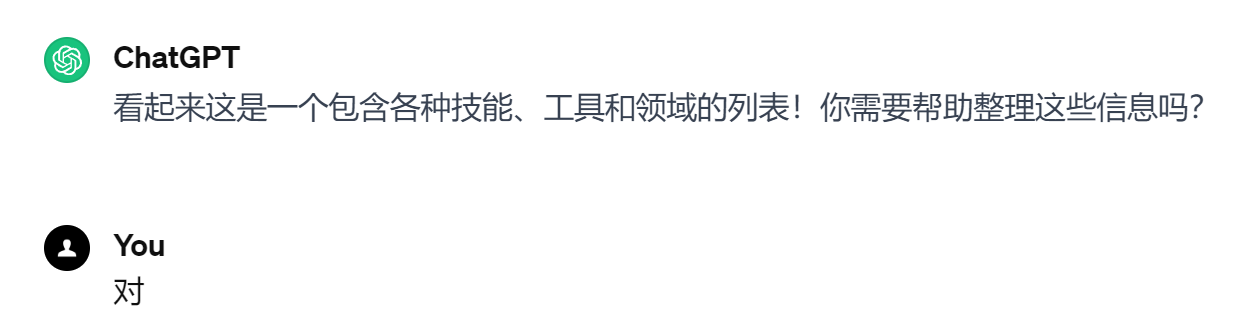

好的，让我来帮你整理一下这个列表。首先，这个列表中有许多重复的条目，例如'C++'和'C语言'可能是同一个技能。要想更好地整理这些条目，我们可以做一些清理工作，包括去除重复项、统一表示方式等。接下来我会处理这些信息。

在整理这些信息时，需要注意以下几点：
1. **去重**：识别并删除重复的技能或领域，比如将'C++'和'C语言'视为同一个。
2. **标准化**：统一相似技能或领域的表示方式，比如将'Python'和'python'视为同一个。
3. **分类**：将相关的技能或领域进行归类，这样可以更清晰地呈现出不同的专业领域和技术栈。

处理完成后，将会有一个更清晰、更易于理解的列表。让我开始整理吧。

已经对列表进行了整理和清理。这是一个更清晰的技能和领域列表：

- 编程语言和框架：Python, C++, Java, C, MATLAB, Shell, Scala, Go, PHP, Objective-C, Swift, Ruby, R, Haskell, Fortran, Rust
- 深度学习和机器学习框架：PyTorch, TensorFlow, Keras, MXNet, PaddlePaddle, Theano, Caffe, scikit-learn, LightGBM, TensorFlow Lite, TF.js, ONNX
- 数据处理和分析：SQL, Spark, Hive, Hadoop, Pandas, NumPy, MATLAB, SPSS, SAS, Tableau, Power BI, Informatica, DataStage
- 自然语言处理（NLP）：NLP, 文本分类, 语言模型, 文本挖掘, 文本生成, 文本预处理, 文本标注, 文字识别, 语义分析, 情感识别, 信息抽取, 句法分析, 文本清洗, 文本提取, 文本摘要, 词性标注, 文本生成任务, 知识图谱, 实体识别, 序列标注, 对话系统, 对话引擎, 对话场景识别, 对话产品, 对话交互, 对话生成, 多轮对话, 多模态算法, 问答系统, 自动问答, QA系统, 机器阅读理解, 语义理解, 语义表示, 语义分析, 语音, 语音识别, 语音合成, 语音处理, 语音技术, 语音算法, 语音识别技术, 语音合成技术, 语音处理技术, 语音识别算法, 语音合成算法, 语音处理算法, 语音识别模型, 语音合成模型, 语音处理模型, 语音识别引擎, 语音合成引擎, 语音处理引擎, 语音识别系统, 语音合成系统, 语音处理系统
- 计算机视觉和图像处理：视觉图像算法, 机器视觉, 图像识别, 图像检测, 图像分类, 图像处理, 视觉定位, 图像增强, 图像优化, 图像开发, 视觉算法, 图像标注, 图像生成, 图像匹配, 视觉设计, 视觉算法, 目标检测, 目标跟踪, 目标分类, 目标识别, 目标定位, 目标分割, 目标提取, 目标检测算法, 目标跟踪算法, 目标分类算法, 目标识别算法, 目标定位算法, 目标分割算法, 目标提取算法, 目标检测模型, 目标跟踪模型, 目标分类模型, 目标识别模型, 目标定位模型, 目标分割模型, 目标提取模型, 目标检测引擎, 目标跟踪引擎, 目标分类引擎, 目标识别引擎, 目标定位引擎, 目标分割引擎, 目标提取引擎, 目标检测系统, 目标跟踪系统, 目标分类系统, 目标识别系统, 目标定位系统, 目标分割系统, 目标提取系统, 视觉智能, 视觉处理, 视觉识别, 视觉技术, 视觉算法, 视觉模型, 视觉引擎, 视觉系统, 视觉应用
- 数据库和存储：MySQL, PostgreSQL, MongoDB, SQL Server, Oracle, HBase, HDFS, Redis, ClickHouse, Elasticsearch, Cassandra
- 并行计算和分布式系统：CUDA, Apache Spark, Apache Hadoop, Hadoop MapReduce, MapReduce, Distributed Systems, Parallel Computing, 多线程并行, 分布式爬虫
- Web 开发：HTML, CSS, JavaScript, Node.js, React, Angular, Vue.js, Django, Flask, Express.js, WebRTC, WebAssembly, Web开发, 前端开发, 后端开发, Web应用, 网页设计, UI设计
- 版本控制和部署：Git, GitHub, GitLab, CI/CD, Jenkins, Docker, Kubernetes, DevOps, Ansible, Terraform
- AI算法和工程：机器学习, 算法, 深度学习, AI, 强化学习, 机器学习算法, AI算法, 算法设计, 算法优化, 模式识别, 模型优化, 模型调优, 模型评估, 模型部署, 模型测试, 模型训练, 模型推理, 模型开发, 模型优化, 模型评估, 模型融合, 模型解释, 模型验证, 模型监控, 模型建模, 模型选择, 模型验证, 模型评价, 模型应用, 模型推广, 模型转化, 模型应用场景, 模型落地, 模型部署, 模型实验, 模型构建, 模型分析, 模型构建, 模型架构, 模型解决, 模型工程化, 模型流程, 模型管理, 模型优化工程, 模型应用工程, 模型架构设计, 模型流程设计, 模型管理系统, 模型监控系统, 模型部署系统

归并的不完全，有很多遗漏

In [172]:
# key:skill ,value:field
skill_mapping = {
    "编程语言和框架": [
        "Python", "C++", "Java", "C", "MATLAB", "Shell", "Scala", "Go", "PHP", "Objective-C", "Swift", "Ruby", 
        "R", "Haskell", "Fortran", "Rust"
    ],
    "深度学习和机器学习框架": [
        "PyTorch", "TensorFlow", "Keras", "MXNet", "PaddlePaddle", "Theano", "Caffe", "scikit-learn", 
        "LightGBM", "TensorFlow Lite", "TF.js", "ONNX"
    ],
    "数据处理和分析": [
        "SQL", "Spark", "Hive", "Hadoop", "Pandas", "NumPy", "MATLAB", "SPSS", "SAS", "Tableau", 
        "Power BI", "Informatica", "DataStage"
    ],
    "自然语言处理(NLP)": [
        "NLP", "文本分类", "语言模型", "文本挖掘", "文本生成", "文本预处理", "文本标注", "文字识别", "语义分析", "情感识别", 
        "信息抽取", "句法分析", "文本清洗", "文本提取", "文本摘要", "词性标注", "文本生成任务", "知识图谱", "实体识别", 
        "序列标注", "对话系统", "对话引擎", "对话场景识别", "对话产品", "对话交互", "对话生成", "多轮对话", "多模态算法", 
        "问答系统", "自动问答", "QA系统", "机器阅读理解", "语义理解", "语义表示", "语义分析", "语音", "语音识别", 
        "语音合成", "语音处理", "语音技术", "语音算法", "语音识别技术", "语音合成技术", "语音处理技术", "语音识别算法", 
        "语音合成算法", "语音处理算法", "语音识别模型", "语音合成模型", "语音处理模型", "语音识别引擎", "语音合成引擎", 
        "语音处理引擎", "语音识别系统", "语音合成系统", "语音处理系统"
    ],
    "计算机视觉和图像处理": [
        "视觉图像算法", "机器视觉", "图像识别", "图像检测", "图像分类", "图像处理", "视觉定位", "图像增强", "图像优化", 
        "图像开发", "视觉算法", "图像标注", "图像生成", "图像匹配", "视觉设计", "视觉算法", "目标检测", "目标跟踪", 
        "目标分类", "目标识别", "目标定位", "目标分割", "目标提取", "目标检测算法", "目标跟踪算法", "目标分类算法", 
        "目标识别算法", "目标定位算法", "目标分割算法", "目标提取算法", "目标检测模型", "目标跟踪模型", "目标分类模型", 
        "目标识别模型", "目标定位模型", "目标分割模型", "目标提取模型", "目标检测引擎", "目标跟踪引擎", "目标分类引擎", 
        "目标识别引擎", "目标定位引擎", "目标分割引擎", "目标提取引擎", "目标检测系统", "目标跟踪系统", "目标分类系统", 
        "目标识别系统", "目标定位系统", "目标分割系统", "目标提取系统", "视觉智能", "视觉处理", "视觉识别", "视觉技术", 
        "视觉算法", "视觉模型", "视觉引擎", "视觉系统", "视觉应用"
    ],
    "数据库和存储": [
        "MySQL", "PostgreSQL", "MongoDB", "SQL Server", "Oracle", "HBase", "HDFS", "Redis", 
        "ClickHouse", "Elasticsearch", "Cassandra"
    ],
    "并行计算和分布式系统": [
        "CUDA", "Apache Spark", "Apache Hadoop", "Hadoop MapReduce", "MapReduce", "Distributed Systems", 
        "Parallel Computing", "多线程并行", "分布式爬虫"
    ],
    "Web 开发": [
        "HTML", "CSS", "JavaScript", "Node.js", "React", "Angular", "Vue.js", "Django", "Flask", 
        "Express.js", "WebRTC", "WebAssembly", "Web开发", "前端开发", "后端开发", "Web应用", "网页设计", 
        "UI设计"
    ],
    "版本控制和部署": [
        "Git", "GitHub", "GitLab", "CI/CD", "Jenkins", "Docker", "Kubernetes", "DevOps", "Ansible", 
        "Terraform"
    ],
    "AI算法和工程": [
        "机器学习", "算法", "深度学习", "AI", "强化学习", "机器学习算法", "AI算法", "算法设计", "算法优化",
        "模式识别", "模型优化", "模型调优", "模型评估", "模型部署", "模型测试", "模型训练", "模型推理",
        "模型开发", "模型优化", "模型评估", "模型融合", "模型解释", "模型验证", "模型监控", "模型建模",
        "模型选择", "模型验证", "模型评价", "模型应用", "模型推广", "模型转化", "模型应用场景", "模型落地",
        "模型部署", "模型实验", "模型构建", "模型分析", "模型构建", "模型架构", "模型解决", "模型工程化",
        "模型流程", "模型管理", "模型优化工程", "模型应用工程", "模型架构设计", "模型流程设计", "模型管理系统",
        "模型监控系统", "模型部署系统"
    ]
}


In [176]:
# 添加空的“技能”列和“没合并技能”列
data['技能'] = ''
data['没合并技能'] = ''

# 遍历“关键词”列，检查关键词是否在技能映射字典中，并将相应的技能添加到“技能”列
for index, row in data.iterrows():
    keyword = str(row['关键词'])  # 将关键词转换为字符串类型！
    skill_found = False  # 设置标志以检查是否找到技能
    for skill, mapped_keywords in skill_mapping.items():
        if keyword.strip() in mapped_keywords:
            data.at[index, '技能'] = skill
            skill_found = True  # 找到了技能，设置标志为 True
            break  # 找到技能后停止查找
    if not skill_found:  # 如果未找到技能，则记录在“没合并技能”列中
        data.at[index, '没合并技能'] = keyword

# 将更新后的数据保存回CSV文件
data.to_csv('your_updated_file.csv', index=False)




In [ ]:
data = pd.read_csv('your_updated_file.csv',encoding='utf-8')

dict13 = dict()

for i in data.iloc[:,13]:
    if i not in dict13.keys(): 
        dict13[i] = 1
    else:
        dict13[i] += 1

sorted_dict = {k: v for k, v in sorted(dict13.items(), key=lambda item: item[1], reverse=True)}

print(sorted_dict)